## Give an upvote if you found this notebook helpful

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fmendesdat263xdemos/exercise.csv
/kaggle/input/fmendesdat263xdemos/calories.csv


### Let's import the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Let's load the datasets

In [3]:
exercise = pd.read_csv('/kaggle/input/fmendesdat263xdemos/exercise.csv')
calories = pd.read_csv('/kaggle/input/fmendesdat263xdemos/calories.csv')

In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
# Let's merge both the datasets on USER_ID column

df = pd.merge(exercise, calories, on = 'User_ID')

In [7]:
df['Intercept'] = 1

If you are wondering about why this Intercept column with value 1 is added. Just be patient now.

In [8]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


### Visualizing our data
As it is obvious that if we workout more then we will loose more calories

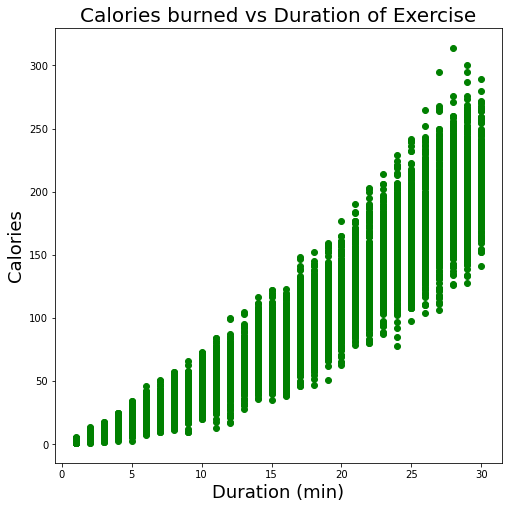

In [9]:
# Visualizing the effect of exercise minutes on calories burned
plt.figure(figsize=(8, 8))
plt.plot(df['Duration'], df['Calories'], 'go');
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.title('Calories burned vs Duration of Exercise', size = 20);

#### Now let's create the feature and response variable

In [10]:
X = df.loc[:, ['Intercept', 'Duration']]
y = df.loc[:, 'Calories']

#### First implementing the linear regression without using any libraries

In [11]:
def linear_regression(X,y):
    _coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    return _coeffs

by_hand_coefs = linear_regression(X.values, y.values)
print('Intercept without using library:', by_hand_coefs[0])
print('Slope without using library: ', by_hand_coefs[1])

Intercept without using library: -21.859656399672428
Slope without using library:  7.172883837907465


### Still wondering about the intercept column. See this formula for the explanation

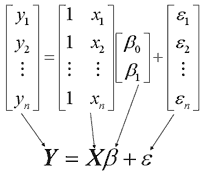

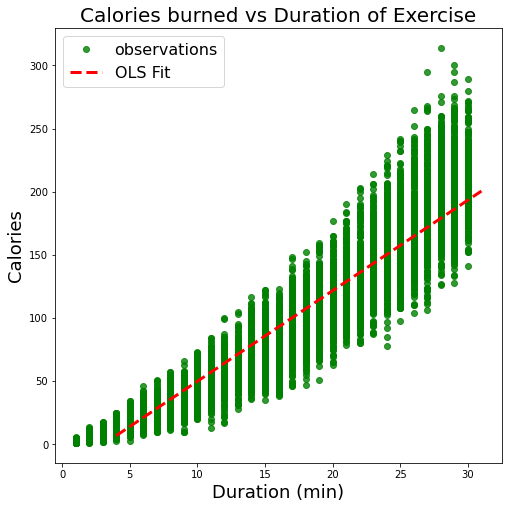

In [12]:
xs = np.linspace(4, 31, 1000)
ys = by_hand_coefs[0] + by_hand_coefs[1] * xs

plt.figure(figsize=(8, 8))

plt.plot(df['Duration'], df['Calories'], 'go',label = 'observations', alpha = 0.8);
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.plot(xs, ys, 'r--', label = 'OLS Fit', linewidth = 3)
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [13]:
# Let's predict something
print(f'Exercising for 35.5 minutes will burn an estimated \
{np.round((by_hand_coefs[0] + by_hand_coefs[1] * 35.5), 2)} calories')

Exercising for 15.5 minutes will burn an estimated 89.32 calories


#### Implementing linear regression with the help of the library

In [14]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(np.array(X.Duration).reshape(-1, 1), y)
print('Intercept using library:', linear_regression.intercept_)
print('Slope using library:', linear_regression.coef_[0])

Intercept using library: -21.859656399672403
Slope using library: 7.172883837907469


### That's it from this notebook and big shoutout for this amazing tutorial to
https://thecleverprogrammer.com/2020/11/26/calories-burned-prediction-with-python/
